### Required Assignment 5.1: Will the Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaurant near where you are driving. Would you accept that coupon and take a short detour to the restaurant? Would you accept the coupon but use it on a subsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaurant? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\$20 - $50).

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [2]:
data = pd.read_csv('data/coupons.csv')

In [3]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

2. Investigate the dataset for missing or problematic data.

In [5]:
#Find the total number of missing values in each column
data.isnull().sum()

destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64

3. Decide what to do about your missing data -- drop, replace, other...

In [6]:
#since car has missing values, let's see the distribution of values in car column
data['car'].value_counts(dropna=False)

car
NaN                                         12576
Scooter and motorcycle                         22
Mazda5                                         22
do not drive                                   22
crossover                                      21
Car that is too old to install Onstar :D       21
Name: count, dtype: int64

In [7]:
#Create a copy of the data frame to work with and replace the missing valu for car with No
df = data
df['car'] = df['car'].fillna('No')

In [8]:
# Drop the remaining entries with missing values
df = df.dropna()

4. What proportion of the total observations chose to accept the coupon?



In [9]:
#Calculate number of coupons accepted
accepted_coupons = df['Y'].value_counts()[1]
print(f'Number of coupons accepted: {accepted_coupons}')
#calculate total number of coupons
total_coupons = df['Y'].count()
print(f'Total number of coupons: {total_coupons}')
#Calculate percentage of coupons accepted
percentage_accepted = (accepted_coupons / total_coupons) * 100
print(f'Percentage of coupons accepted: {percentage_accepted:.2f}%')

Number of coupons accepted: 6877
Total number of coupons: 12079
Percentage of coupons accepted: 56.93%


5. Use a bar plot to visualize the `coupon` column.

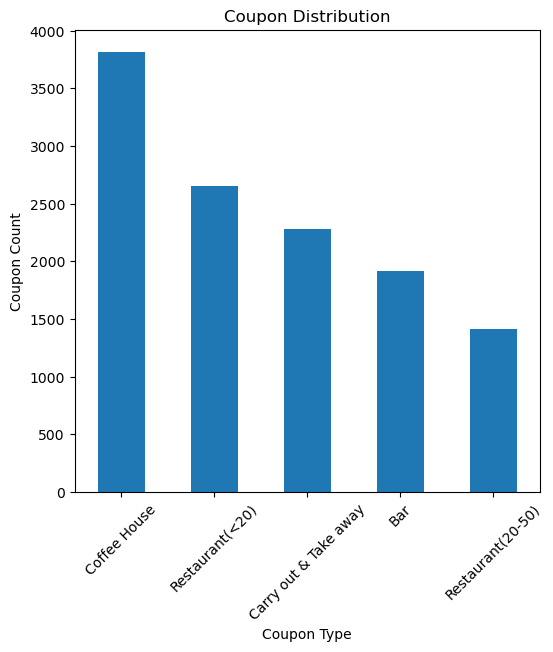

In [10]:
#Visualize the coupon column
plt.figure(figsize=(6,6))
df['coupon'].value_counts().plot(kind='bar')
plt.title('Coupon Distribution')
plt.xlabel('Coupon Type')
plt.xticks(rotation=45)
plt.ylabel('Coupon Count')
plt.show()

6. Use a histogram to visualize the temperature column.

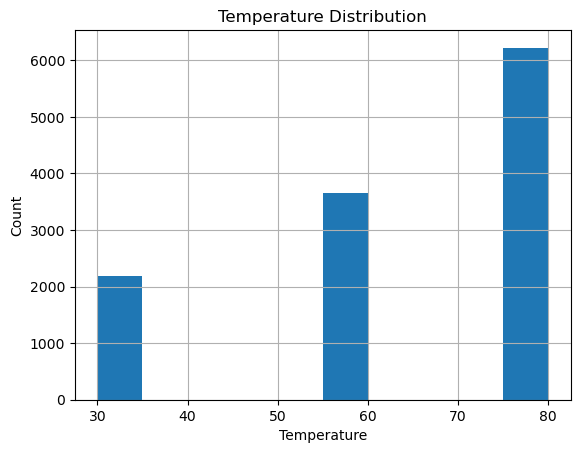

In [11]:
df['temperature'].hist()
plt.title('Temperature Distribution')
plt.xlabel('Temperature')
plt.ylabel('Count')
plt.show()

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [12]:
bar_coupon_df=df.query("coupon == 'Bar'")

In [13]:
bar_coupon_df.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
35,Home,Alone,Sunny,55,6PM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,1,0,1
39,Work,Alone,Sunny,55,7AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,1,1,0,1,1
46,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,46,Single,...,4~8,1~3,1~3,never,1,0,0,0,1,0
57,Home,Alone,Sunny,55,6PM,Bar,1d,Male,46,Single,...,4~8,1~3,1~3,never,1,0,0,1,0,0


In [14]:
bar_coupon_df.shape

(1913, 26)

2. What proportion of bar coupons were accepted?


In [15]:
#calculate number of accepted bar coupon
accepted_bar_coupons = bar_coupon_df['Y'].value_counts()[1]
print(f'Number of Bar coupons accepted: {accepted_bar_coupons}')
#calculate total number of bar coupons
total_bar_coupons = bar_coupon_df['Y'].count()
print(f'Total number of Bar coupons: {total_bar_coupons}')
#Calculate percentage of bar coupons accepted
percentage_accepted_bar = (accepted_bar_coupons / total_bar_coupons) * 100
print(f'Percentage of Bar coupons accepted: {percentage_accepted_bar:.2f}%')

Number of Bar coupons accepted: 788
Total number of Bar coupons: 1913
Percentage of Bar coupons accepted: 41.19%


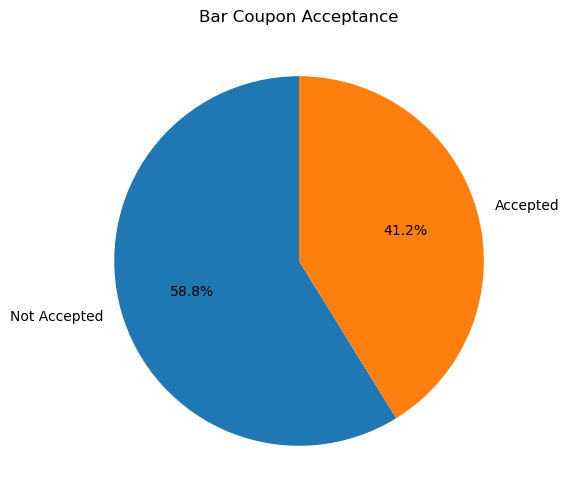

In [16]:
# Visualization of bar coupon acceptance
plt.figure(figsize=(6,6))
plt.pie(bar_coupon_df['Y'].value_counts(), labels=['Not Accepted', 'Accepted'], autopct='%1.1f%%', startangle=90)
plt.title('Bar Coupon Acceptance')
plt.show()

3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [17]:
# Calculate the mean for customers who went to bar 3 or fewer times a month
# 'never', 'less1', '1~3' represent 3 or fewer times
mean_accepted_bar_3_or_fewer = bar_coupon_df[bar_coupon_df['Bar'].isin(['never', 'less1', '1~3'])]['Y'].mean() * 100

# Calculate the mean for customers who went to bar more than 3 times a month  
# '4~8', 'gt8' represent more than 3 times
mean_accepted_bar_more_than_3 = bar_coupon_df[bar_coupon_df['Bar'].isin(['4~8', 'gt8'])]['Y'].mean() * 100

print(f'Mean percentage of customers who accepted Bar coupon and went to bar 3 or fewer times a month: {mean_accepted_bar_3_or_fewer:.2f}%')
print(f'Mean percentage of customers who accepted Bar coupon and went to bar more than 3 times a month: {mean_accepted_bar_more_than_3:.2f}%')

Mean percentage of customers who accepted Bar coupon and went to bar 3 or fewer times a month: 37.27%
Mean percentage of customers who accepted Bar coupon and went to bar more than 3 times a month: 76.17%


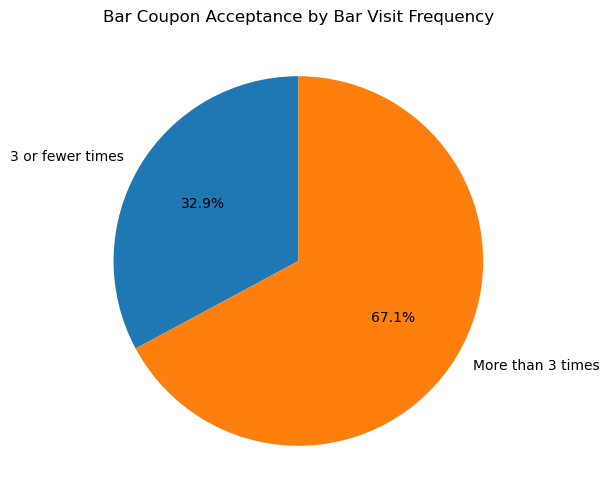

In [18]:
#use seaborn to visualize using a pie chart
labels = ['3 or fewer times', 'More than 3 times']
sizes = [mean_accepted_bar_3_or_fewer, mean_accepted_bar_more_than_3]
plt.figure(figsize=(6,6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Bar Coupon Acceptance by Bar Visit Frequency')
plt.show()

4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [19]:
# Let's check what values are in the Bar column
print("Unique values in Bar column:")
print(bar_coupon_df['Bar'].value_counts())
print("\nUnique values in age column:")
print(bar_coupon_df['age'].value_counts())

Unique values in Bar column:
Bar
never    788
less1    553
1~3      379
4~8      147
gt8       46
Name: count, dtype: int64

Unique values in age column:
age
21         397
26         368
31         324
50plus     273
36         196
41         171
46         103
below21     81
Name: count, dtype: int64


In [20]:
# First, filter drivers over 25 (ages 26, 31, 36, 41, 46, 50plus)
drivers_over_25 = bar_coupon_df[bar_coupon_df['age'].isin(['26', '31', '36', '41', '46', '50plus'])]
# Then filter for those who go to bars more than once a month ('1~3', '4~8', 'gt8')
drivers_over_25_more_than_once = drivers_over_25[drivers_over_25['Bar'].isin(['1~3', '4~8', 'gt8'])]
acceptance_rate_over_25_more_than_once = drivers_over_25_more_than_once['Y'].mean() * 100

print(f'Count of drivers over 25 who go to bar more than once a month: {len(drivers_over_25_more_than_once)}')
print(f'Acceptance rate for drivers over 25 who go to a bar more than once a month: {acceptance_rate_over_25_more_than_once:.2f}%')

# All other drivers (everyone except the group above)
all_other_drivers = bar_coupon_df.drop(drivers_over_25_more_than_once.index)
acceptance_rate_all_other_drivers = all_other_drivers['Y'].mean() * 100
print(f'Count of all other drivers: {len(all_other_drivers)}')
print(f'Acceptance rate for all other drivers: {acceptance_rate_all_other_drivers:.2f}%')


Count of drivers over 25 who go to bar more than once a month: 403
Acceptance rate for drivers over 25 who go to a bar more than once a month: 68.98%
Count of all other drivers: 1510
Acceptance rate for all other drivers: 33.77%


Text(0.5, 1.0, 'Bar Coupon Acceptance Rate Comparison')

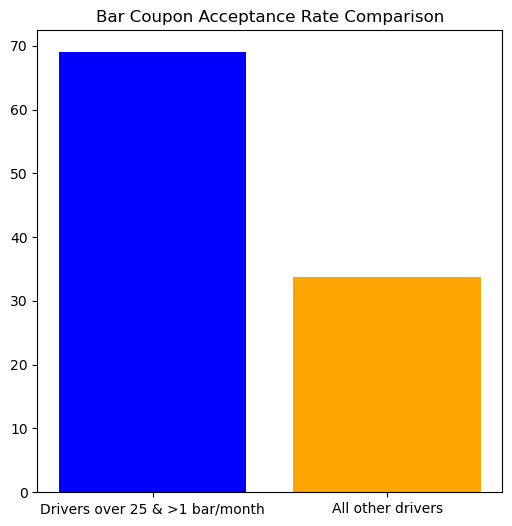

In [21]:
#visualize the above comparison using a bar chart and seaborn
labels = ['Drivers over 25 & >1 bar/month', 'All other drivers']
sizes = [acceptance_rate_over_25_more_than_once, acceptance_rate_all_other_drivers]
plt.figure(figsize=(6,6))
plt.bar(labels, sizes, color=['blue', 'orange'])
plt.title('Bar Coupon Acceptance Rate Comparison')

5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.


In [22]:
#First filter drivers who frequently visit bars ('1~3', '4~8', 'gt8')
drivers_frequent_bar_vists= bar_coupon_df[bar_coupon_df['Bar'].isin(['1~3', '4~8', 'gt8'])]
#Filter out those with kid passengers
drivers_no_kid_passerngers = drivers_frequent_bar_vists[drivers_frequent_bar_vists['passanger'] != 'Kid(s)']
#Filter out those in Farming Fishing & Forestry occupation
other_occupation = drivers_no_kid_passerngers[drivers_no_kid_passerngers['occupation'] != 'Farming Fishing & Forestry']

accptance_rate_special_group = other_occupation['Y'].mean() * 100
print(f'Acceptance rate for drivers who frequently visit bars, have no kid passengers, and are not in Farming Fishing & Forestry: {accptance_rate_special_group:.2f}%')
acceptance_rate_not_in_special_group = bar_coupon_df.drop(other_occupation.index)['Y'].mean() * 100
print(f'Acceptance rate for all other drivers: {acceptance_rate_not_in_special_group:.2f}%')

Acceptance rate for drivers who frequently visit bars, have no kid passengers, and are not in Farming Fishing & Forestry: 70.94%
Acceptance rate for all other drivers: 29.79%


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.



In [23]:
#First case filter dataframe to find people who go to bars more than once a month, have no kid passengers and are not widowed
drivers_frequent_bar_vists= bar_coupon_df[bar_coupon_df['Bar'].isin(['1~3', '4~8', 'gt8'])]
drivers_no_kid_passerngers = drivers_frequent_bar_vists[drivers_frequent_bar_vists['passanger'] != 'Kid(s)']
drivers_not_widowed = drivers_no_kid_passerngers[drivers_no_kid_passerngers['maritalStatus'] != 'Widowed']
acceptance_rate_special_group_2 = drivers_not_widowed['Y'].mean() * 100
print(f'Acceptance rate for drivers who frequently visit bars, have no kid passengers, and are not widowed: {acceptance_rate_special_group_2:.2f}%')

#second case filter dataframe to find people who visit bars more than once a month and are under the age of 30
drivers_frequent_bar_vists= bar_coupon_df[bar_coupon_df['Bar'].isin(['1~3', '4~8', 'gt8'])]
drivers_under_30 = drivers_frequent_bar_vists[drivers_frequent_bar_vists['age'].isin(['below21', '21', '26'])]
acceptance_rate_special_group_3 = drivers_under_30['Y'].mean() * 100
print(f'Acceptance rate for drivers who frequently visit bars and are under the age of 30: {acceptance_rate_special_group_3:.2f}%')

#third case filter dataframe to find people who go to cheap restaurants more than 4 times a month and income is less than 50K
drivers_frequent_cheap_restaurants = bar_coupon_df[bar_coupon_df['RestaurantLessThan20'].isin(['4~8', 'gt8'])]
drivers_low_income = drivers_frequent_cheap_restaurants[drivers_frequent_cheap_restaurants['income'].isin(['Less than $12500', '$12500 - $24999', '$25000 - $37499', '$37500 - $49999'])]
acceptance_rate_special_group_4 = drivers_low_income['Y'].mean() * 100
print(f'Acceptance rate for drivers who frequently visit cheap restaurants and have income less than 50K: {acceptance_rate_special_group_4:.2f}%')

Acceptance rate for drivers who frequently visit bars, have no kid passengers, and are not widowed: 70.94%
Acceptance rate for drivers who frequently visit bars and are under the age of 30: 71.95%
Acceptance rate for drivers who frequently visit cheap restaurants and have income less than 50K: 45.65%


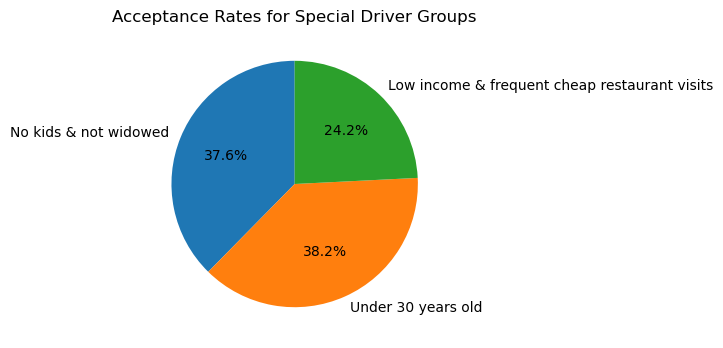

In [24]:
data =[acceptance_rate_special_group_2, acceptance_rate_special_group_3, acceptance_rate_special_group_4]
labels = ['No kids & not widowed', 'Under 30 years old', 'Low income & frequent cheap restaurant visits']
plt.figure(figsize=(4,4))
plt.pie(data, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Acceptance Rates for Special Driver Groups')
plt.show()

7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

Based on the above observations we can conclude that

- The visitors who frequently visit bars are more likely to accept coupons

- Among those who do visit bars more frequently the younger visitors (less than 30) are more likely to accept coupons as compared to older people or those with kids. This may reflect the fact that younger people tend to socialize more and visit bars and are more inclined to accept coupons or discounts for such activities

- Drivers who frequently visit cheap restaurants and have an income less than 50K tend to refuse the coupons more often. This indicates that there may be some dietary preferences or other behavioral characteristics among lower income driver because of which they would refuse a coupon/discount to a bar.

From the data it apprears that drivers who vist bars more regularly are more likely to accept the coupon.
The data also shows that age, maritial status, frequency of bar visits, economic conditions play an important role in the likelyhood of accepting bar coupons.


### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

In [25]:
df['coupon'].unique()

array(['Restaurant(<20)', 'Coffee House', 'Bar', 'Carry out & Take away',
       'Restaurant(20-50)'], dtype=object)

In [26]:
#Lets create a new data frame with only the carry out and Take away coupons
df_carryout_coupon = df.query("coupon == 'Carry out & Take away'")

In [27]:
df_carryout_coupon.shape

(2280, 26)

In [28]:
#Lets calculate the percentage of carry out coupons accepted
accepted_carryout_coupons = df_carryout_coupon['Y'].value_counts()[1]
total_carryout_coupons = df_carryout_coupon['Y'].count()
percentage_accepted_carryout = (accepted_carryout_coupons / total_carryout_coupons) * 100
print(f'Percentage of Carry out & Take away coupons accepted: {percentage_accepted_carryout:.2f}%')

Percentage of Carry out & Take away coupons accepted: 73.77%


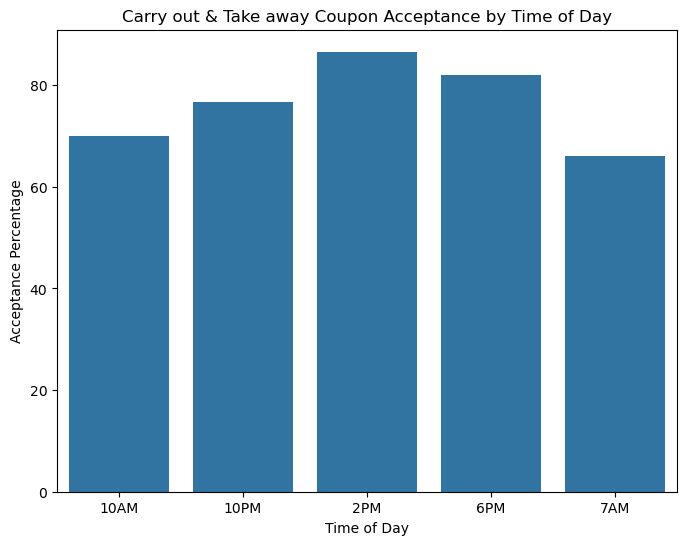

In [29]:
#Lets create a bar plot of carryout coupon acceptance by time of day
carryout_acceptance_by_time = df_carryout_coupon.groupby('time')['Y'].mean() * 100
plt.figure(figsize=(8,6))
sns.barplot(x=carryout_acceptance_by_time.index, y=carryout_acceptance_by_time.values, )
plt.title('Carry out & Take away Coupon Acceptance by Time of Day')
plt.xlabel('Time of Day')
plt.ylabel('Acceptance Percentage')
plt.show()

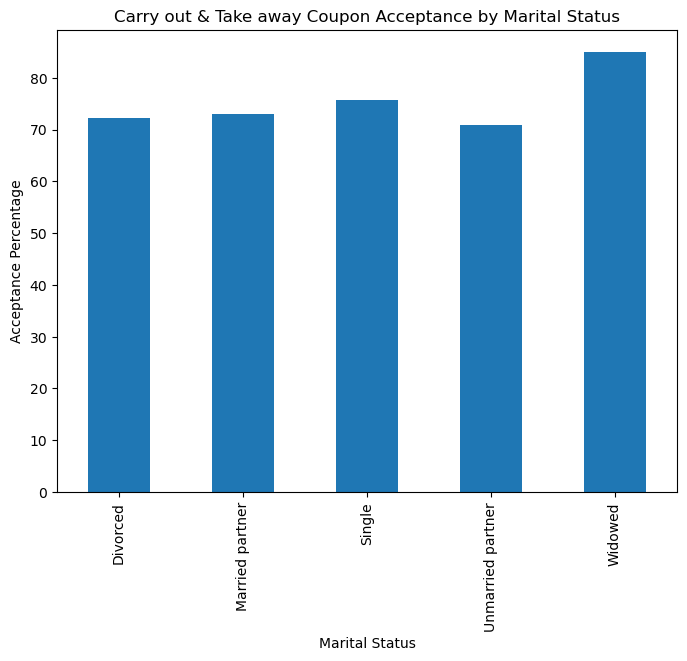

In [30]:
#Distribution of carry out coupon acceptance by maritial status
carryout_acceptance_by_maritalStatus = df_carryout_coupon.groupby('maritalStatus')['Y'].mean() * 100
carryout_acceptance_by_maritalStatus.plot(kind='bar', figsize=(8,6))
plt.title('Carry out & Take away Coupon Acceptance by Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Acceptance Percentage')
plt.show()

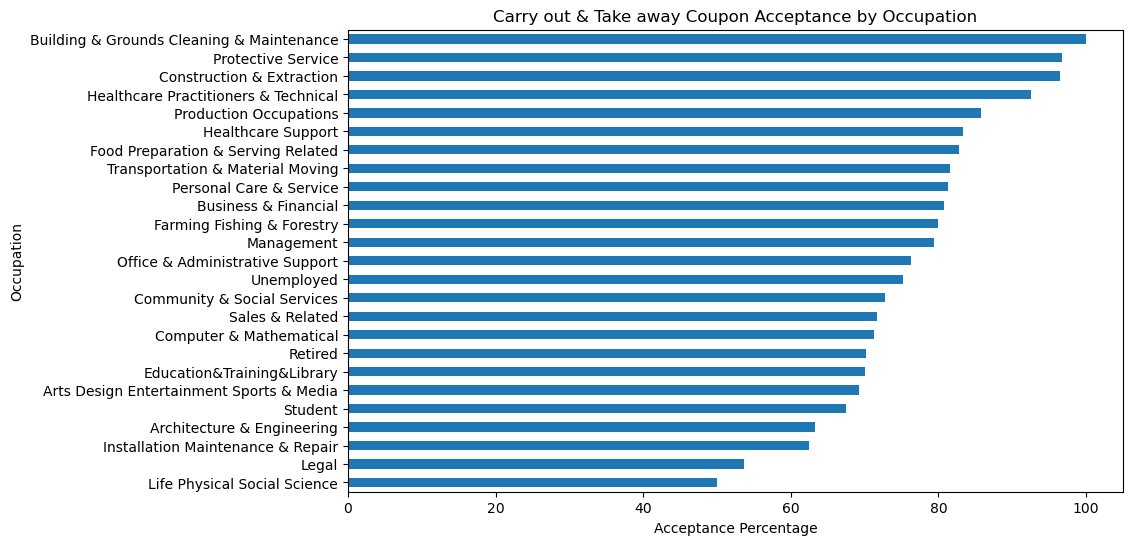

In [31]:
#distribution of carry out coupon acceptance by occupation
carryout_acceptance_by_occupation = df_carryout_coupon.groupby('occupation')['Y'].mean() * 100
carryout_acceptance_by_occupation.sort_values().plot(kind='barh', figsize=(10,6))  
plt.title('Carry out & Take away Coupon Acceptance by Occupation')
plt.xlabel('Acceptance Percentage')
plt.ylabel('Occupation')
plt.show()

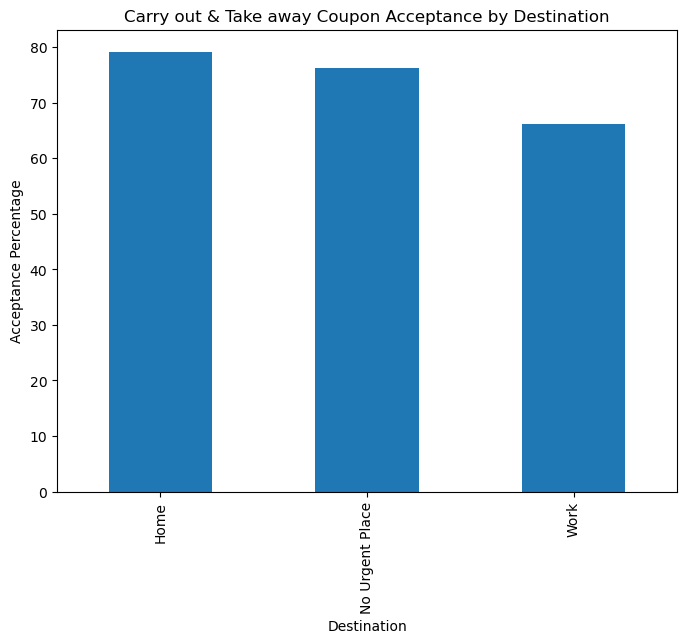

In [32]:
#distribution of carry out coupon acceptance by destination
carryout_acceptance_by_destination = df_carryout_coupon.groupby('destination')['Y'].mean() * 100
carryout_acceptance_by_destination.plot(kind='bar', figsize=(8,6))
plt.title('Carry out & Take away Coupon Acceptance by Destination')
plt.xlabel('Destination')
plt.ylabel('Acceptance Percentage')
plt.show()

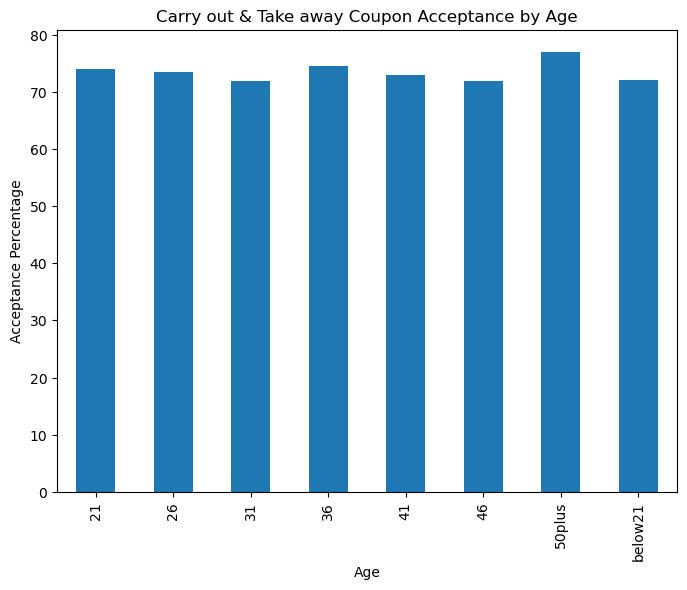

In [33]:
#distribution of carry out coupon acceptance by age
carryout_acceptance_by_age = df_carryout_coupon.groupby('age')['Y'].mean() * 100
carryout_acceptance_by_age.plot(kind='bar', figsize=(8,6))
plt.title('Carry out & Take away Coupon Acceptance by Age')
plt.xlabel('Age')
plt.ylabel('Acceptance Percentage')
plt.show()

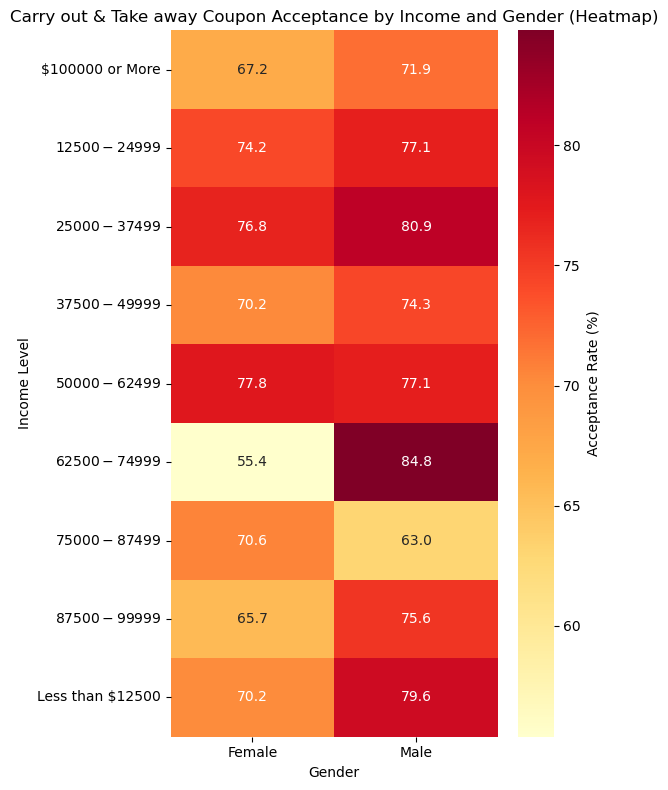

In [34]:
#distribution of carry out coupon acceptance by income and gender
carryout_acceptance_by_income_and_gender = df_carryout_coupon.groupby(['income', 'gender'])['Y'].mean() * 100
#print( carryout_acceptance_by_income_and_gender)
#visualize the above data using seaborn
carryout_acceptance_unstacked = carryout_acceptance_by_income_and_gender.unstack()
plt.figure(figsize=(6,8))
sns.heatmap(carryout_acceptance_unstacked, annot=True, fmt=".1f", cmap="YlOrRd", cbar_kws={'label': 'Acceptance Rate (%)'})
plt.title('Carry out & Take away Coupon Acceptance by Income and Gender (Heatmap)')
plt.xlabel('Gender')
plt.ylabel('Income Level')
plt.tight_layout()
plt.show()



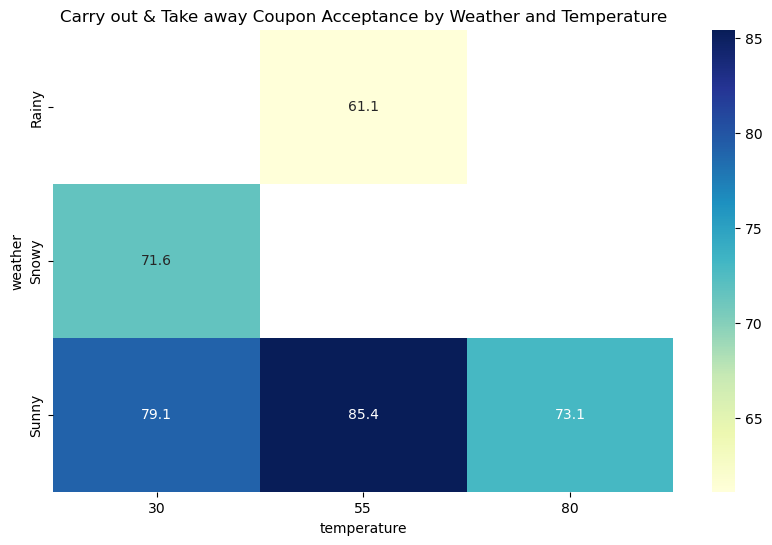

In [35]:
#distribution of carry out coupon acceptance by weather and temperature
carryout_acceptance_by_weather_temp = df_carryout_coupon.groupby(['weather', 'temperature'])['Y'].mean() * 100
#visualize using seaborn heatmap
carryout_acceptance_by_weather_temp = carryout_acceptance_by_weather_temp.unstack()
plt.figure(figsize=(10,6))
sns.heatmap(carryout_acceptance_by_weather_temp, annot=True, fmt=".1f", cmap="YlGnBu")
plt.title('Carry out & Take away Coupon Acceptance by Weather and Temperature')
plt.show()

# Observations

- The data shows that widowed and single folks tend to accept carry out/take away coupons where as married and folks with partners would much rather eat at the restaurant.
- Folks having a more labour intensive work like cleaning, maintenance and construction have a higher probability of accepting take away coupons as compared to folks with more of a desk job and people generally tend to take take away on their way home
- Men are more likely to accept accept take away coupons as compared to women
- Weather and temperature also seem to influence wether drivers accept the take away coupons or not with a acceptance rate of over 72% on sunny days as compared to 69% on rainy days